In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Data=pd.read_csv('KYPHOSIS.csv')

In [3]:
Data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [4]:
Data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


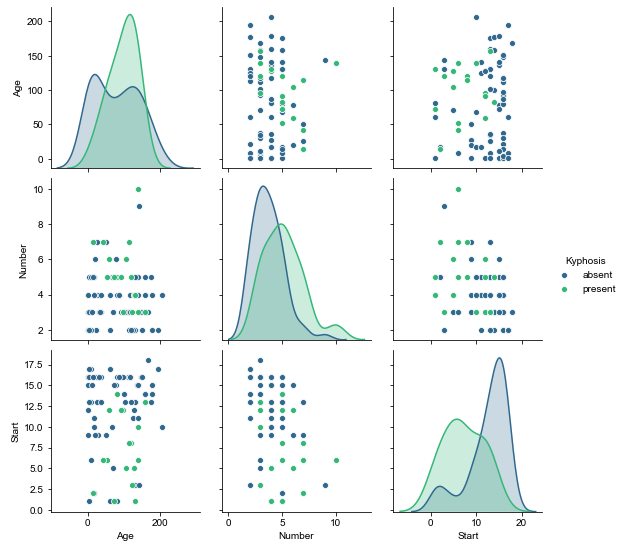

In [5]:
sns.pairplot(Data,hue='Kyphosis',palette='viridis')
sns.set_style('darkgrid')

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
x=Data.iloc[:,[1,2,3]]

In [8]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [9]:
Data.isnull().count()

Kyphosis    81
Age         81
Number      81
Start       81
dtype: int64

In [10]:
Scaler=StandardScaler()

In [11]:
Scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
Scaler_Features=Scaler.transform(x)

In [13]:
Scaler_Features

array([[-0.21914343, -0.65203532, -1.33790708],
       [ 1.28749437, -0.65203532,  0.51634056],
       [ 0.7679641 , -0.03068401, -1.33790708],
       [-1.41406306,  0.59066729, -2.16201714],
       [-1.43138074, -0.03068401,  0.72236808],
       [-1.43138074, -1.27338662,  0.92839559],
       [-0.39232019, -1.27338662,  1.13442311],
       [-0.80794441, -0.65203532,  0.92839559],
       [ 0.50819896, -1.27338662,  0.92839559],
       [-0.42695554,  1.21201859,  0.10428553],
       [-0.02864899,  0.59066729,  0.51634056],
       [ 1.11431761, -0.65203532,  0.92839559],
       [-1.13698025,  0.59066729, -1.95598962],
       [-1.43138074, -0.03068401,  0.10428553],
       [ 1.46067113, -0.65203532,  1.34045062],
       [-1.43138074, -0.65203532,  0.92839559],
       [-0.0979197 ,  1.21201859,  0.72236808],
       [ 1.58189486,  0.59066729,  0.31031305],
       [-0.06328435,  0.59066729,  0.92839559],
       [-0.98112117, -0.03068401, -0.51379701],
       [-1.06770955, -1.27338662,  0.928

In [14]:
Data1=pd.DataFrame(data=Scaler_Features,columns=x.columns)

In [15]:
Data1

,Age,Number,Start
0,-0.219143,-0.652035,-1.337907
1,1.287494,-0.652035,0.516341
2,0.767964,-0.030684,-1.337907
3,-1.414063,0.590667,-2.162017
4,-1.431381,-0.030684,0.722368
...,...,...,...
76,1.270177,-0.652035,0.310313
77,-0.998439,1.833370,0.310313
78,0.629423,-1.273387,0.310313
79,-0.721356,1.833370,-1.131880


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(Data1,Data['Kyphosis'],test_size=0.30)

In [18]:
x_train.count()

Age       56
Number    56
Start     56
dtype: int64

In [19]:
x_test.count()

Age       25
Number    25
Start     25
dtype: int64

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
DTREE=DecisionTreeClassifier()

In [22]:
DTREE.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
y_pred=DTREE.predict(x_test)

In [24]:
y_pred

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'present',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [26]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.79      0.83      0.81        18
     present       0.50      0.43      0.46         7

    accuracy                           0.72        25
   macro avg       0.64      0.63      0.64        25
weighted avg       0.71      0.72      0.71        25

[[15  3]
 [ 4  3]]
0.72
